In [1]:
# content_layers_default = []
#         style_layers_default = 

import torch
import torch.nn as nn
from torchvision.models import vgg19,VGG19_Weights
from collections import namedtuple

class myVgg19(nn.Module):
    def __init__(self,):
        super().__init__()

        vgg19model = vgg19(weights=VGG19_Weights.DEFAULT)
        vgg_pretrained_features = vgg19model.features

        self.features = ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1','conv4_2', 'relu5_1']

        self.slice1 = nn.Sequential()
        self.slice2 = nn.Sequential()
        self.slice3 = nn.Sequential()
        self.slice4 = nn.Sequential()
        self.slice5 = nn.Sequential()
        self.slice6 = nn.Sequential()
        for x in range(2):
            self.slice1.add_module(str(x), vgg_pretrained_features[x])
        for x in range(2,7):
            self.slice2.add_module(str(x), vgg_pretrained_features[x])
        for x in range(7,12):
            self.slice3.add_module(str(x), vgg_pretrained_features[x])
        for x in range(12,21):
            self.slice4.add_module(str(x), vgg_pretrained_features[x])
        for x in range(21,22): # conv4 거치고 바로 뽑아냄. relu 전에
            self.slice5.add_module(str(x), vgg_pretrained_features[x])
        for x in range(22,30):
            self.slice6.add_module(str(x), vgg_pretrained_features[x])
            
        for param in self.parameters():
            param.requires_grad = False 
        

    def forward(self,x):
        relu1 = self.slice1(x)
        relu2 = self.slice2(relu1)
        relu3 = self.slice3(relu2)
        relu4 = self.slice4(relu3)
        conv4 = self.slice5(relu4)
        relu5 = self.slice6(conv4)

        vgg_outputs = namedtuple('VggOutputs',self.features)
        outputs = vgg_outputs(relu1,relu2,relu3,relu4,conv4,relu5)

        return outputs
        



d:\miniconda3\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
myVgg = myVgg19()

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

loss = torch.FloatTensor([0.0])

# 변환하려는 이미지 경로
content_image_path = './data/neural_style_transfer/tubingen.jpg'
# 스타일 이미지 경로
style_reference_image_path = './data/neural_style_transfer/starry-night.jpg'

# 생성된 사진의 차원
width, height,_ = cv.imread(content_image_path).shape
 # [768,1024,3]
img_columns = 600
img_rows = int(width * img_columns / height)

print(img_rows,img_columns)

def preprocess_image(image_path):
    img = cv.imread(image_path) #[h,w,c] BGR uint
    img = cv.resize(img,dsize=( img_columns,img_rows)) ##[w,h]순서인가? 
    plt.imshow(img)
    img = np.expand_dims(img, axis=0)
    img = img /255.0
    print(img)
    img_tensor = torch.FloatTensor(img).permute((0,3,1,2))
    print(img_tensor.shape)
    #img = vgg19.preprocess_input(img)
    return img_tensor


450 600


[[[[0.25098039 0.29411765 0.2627451 ]
   [0.16470588 0.11764706 0.08627451]
   [0.22745098 0.11372549 0.07843137]
   ...
   [0.48235294 0.61960784 0.67843137]
   [0.47843137 0.63921569 0.69803922]
   [0.48235294 0.65490196 0.70980392]]

  [[0.30588235 0.25098039 0.23921569]
   [0.2745098  0.1372549  0.1254902 ]
   [0.34117647 0.14901961 0.13333333]
   ...
   [0.53333333 0.65882353 0.7254902 ]
   [0.49411765 0.63921569 0.70588235]
   [0.47843137 0.63529412 0.69803922]]

  [[0.28235294 0.19607843 0.19215686]
   [0.28235294 0.11764706 0.11372549]
   [0.3254902  0.11372549 0.10588235]
   ...
   [0.54901961 0.67058824 0.74509804]
   [0.54509804 0.6745098  0.74901961]
   [0.49019608 0.62352941 0.69803922]]

  ...

  [[0.32156863 0.48235294 0.58823529]
   [0.26666667 0.37647059 0.42352941]
   [0.34901961 0.42352941 0.43137255]
   ...
   [0.31372549 0.34509804 0.37254902]
   [0.24705882 0.36078431 0.39215686]
   [0.30980392 0.51372549 0.54117647]]

  [[0.34117647 0.49411765 0.60392157]
   [0.3

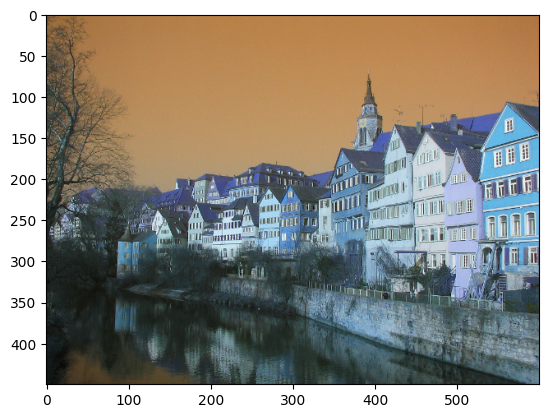

In [26]:
content_image = preprocess_image(content_image_path)  #[1,450, 600, 3] ->[1,3,450,600]



[[[[0.25098039 0.29411765 0.2627451 ]
   [0.16470588 0.11764706 0.08627451]
   [0.22745098 0.11372549 0.07843137]
   ...
   [0.48235294 0.61960784 0.67843137]
   [0.47843137 0.63921569 0.69803922]
   [0.48235294 0.65490196 0.70980392]]

  [[0.30588235 0.25098039 0.23921569]
   [0.2745098  0.1372549  0.1254902 ]
   [0.34117647 0.14901961 0.13333333]
   ...
   [0.53333333 0.65882353 0.7254902 ]
   [0.49411765 0.63921569 0.70588235]
   [0.47843137 0.63529412 0.69803922]]

  [[0.28235294 0.19607843 0.19215686]
   [0.28235294 0.11764706 0.11372549]
   [0.3254902  0.11372549 0.10588235]
   ...
   [0.54901961 0.67058824 0.74509804]
   [0.54509804 0.6745098  0.74901961]
   [0.49019608 0.62352941 0.69803922]]

  ...

  [[0.32156863 0.48235294 0.58823529]
   [0.26666667 0.37647059 0.42352941]
   [0.34901961 0.42352941 0.43137255]
   ...
   [0.31372549 0.34509804 0.37254902]
   [0.24705882 0.36078431 0.39215686]
   [0.30980392 0.51372549 0.54117647]]

  [[0.34117647 0.49411765 0.60392157]
   [0.3

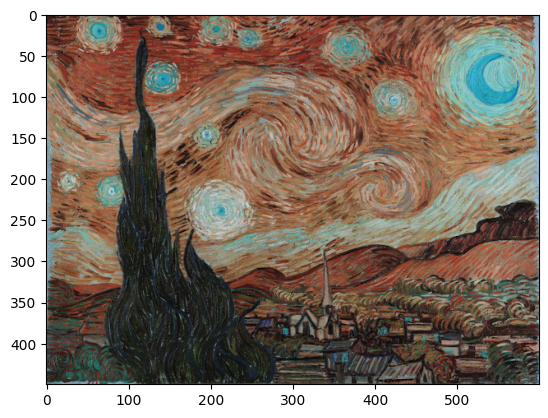

In [84]:
style_reference_image = preprocess_image(style_reference_image_path)


In [27]:

def content_loss(base, combination):
    loss_fn = nn.MSELoss()
    return loss_fn(base,combination)

def gram_matrix(x): #여기 batch가 들어오면 안 될 것 같은데
    ## x 자리에 오는 건 style layers 아닌가? 층마다 크기 같나? res net이면 같을 수도?
    features = x.flatten(start_dim=1) #[features, row*col]

    gram = torch.mm(features,features.T)
    return gram 
def style_loss(style,combination):
    s = gram_matrix(style) #[64,64] [features,features]
    c = gram_matrix(combination) #[64,64]
    channel = 3
    size = img_rows*img_columns
    return torch.sum(torch.square(s-c))/(4.0*(channel**2)*(size**2))

def total_variation_loss(x): 
    #x[:,:,:img_rows-1,:img_columns-1] #[1, 3, 449, 599]
    a = torch.square(x[:,:,:img_rows-1,:img_columns-1]- x[:,:,1:,:img_columns-1]) 
    b = torch.square(x[:,:,:img_rows-1,:img_columns-1] - x[:,:,:img_rows-1,1:])
    return torch.sum(torch.pow(a+b,1.25))



In [28]:
from torch.optim import LBFGS


x_input = torch.concat([content_image,style_reference_image])
print(x_input.shape)
outputs = myVgg(x_input)

torch.Size([2, 3, 450, 600])


TypeError: tuple indices must be integers or slices, not str

In [31]:
from torch.autograd import Variable


batch_size = 1

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

gaussian_noise_img = np.random.normal(loc=0, scale=90., size=content_image.shape).astype(np.float32)
combination_image = torch.from_numpy(gaussian_noise_img).float().to(device)
#optimizing_img = Variable(combination_image, requires_grad=True)

optimizing_img = combination_image.clone().detach().requires_grad_(True)


def build_loss(outputs,optimizing_img):
# ['relu1_1', 'relu2_1', 'relu3_1', 'relu4_1','conv4_2', 'relu5_1']
#outputs를 구간 별로 나누고 -> 그 다음 target/refer/comb로 나눠야 함.
    content_index = 4
    style_indices = list(range(0,6))
    style_indices.remove(4) #[0, 1, 2, 3, 5]

    # 손실 항목의 가중치 평균에 사용할 가중치
    total_variation_weight = 1
    style_weight = 100
    content_weight = 20

    comb_outputs = myVgg(optimizing_img)

    content_outputs = outputs[content_index] #[2, 512, 56, 75]
    content_target = content_outputs[0] #[512, 56, 75]
    content_comb =  comb_outputs[content_index][0] #[512, 56, 75]

    cont_loss = content_loss(content_target,content_comb)*content_weight
    sty_loss = torch.FloatTensor([0.0])

    for style_outputs_index in style_indices:
        style_outputs = outputs[style_outputs_index] #[3,64, 450, 600]
        style_ref = style_outputs[1] #[64, 450, 600]
        style_comb = comb_outputs[style_outputs_index][0]
        sty_loss +=style_loss(style_ref,style_comb)*style_weight/len(style_indices)
        
    tv_loss = total_variation_loss(optimizing_img)*total_variation_weight
    total_loss = cont_loss+sty_loss+tv_loss

    return total_loss,cont_loss,sty_loss,tv_loss


In [147]:

total_loss,cont_loss,sty_loss,tv_loss = build_loss(outputs,comb_outputs)


In [36]:
from torch.optim import LBFGS

num_of_iterations = 200

total_loss_hist =[]
content_loss_hist = []
style_loss_hist = []
tv_loss_hist =[]

optimizer = LBFGS((optimizing_img,), max_iter=num_of_iterations, line_search_fn='strong_wolfe')
cnt = 0

def closure():
    global cnt
    optimizer.zero_grad()
    total_loss, content_loss, style_loss, tv_loss = build_loss(outputs,optimizing_img)
    total_loss_hist.append(torch.log(total_loss).item())
    content_loss_hist.append(torch.log(content_loss).item())
    style_loss_hist.append(torch.log(style_loss).item())
    tv_loss_hist.append(torch.log(tv_loss).item())

    if total_loss.requires_grad:
        total_loss.backward()
    with torch.no_grad():
        print(f'L-BFGS | iteration: {cnt:03}, total loss={total_loss.item():12.4f}, content_loss={content_loss.item():12.4f}, style loss={style_loss.item():12.4f}, tv loss={tv_loss.item():12.4f}')

    cnt += 1
    return total_loss
optimizer.step(closure)



L-BFGS | iteration: 000, total loss=3043564716032.0000, content_loss= 472612.3438, style loss=2638699823104.0000, tv loss=404864368640.0000
L-BFGS | iteration: 001, total loss=3043564453888.0000, content_loss= 472612.3438, style loss=2638699560960.0000, tv loss=404864368640.0000
L-BFGS | iteration: 002, total loss=3043561832448.0000, content_loss= 472612.2500, style loss=2638696939520.0000, tv loss=404864303104.0000
L-BFGS | iteration: 003, total loss=3043554754560.0000, content_loss= 472612.0312, style loss=2638689861632.0000, tv loss=404864237568.0000
L-BFGS | iteration: 004, total loss=3043508355072.0000, content_loss= 472610.5938, style loss=2638643986432.0000, tv loss=404863844352.0000
L-BFGS | iteration: 005, total loss=3043307290624.0000, content_loss= 472604.2500, style loss=2638445019136.0000, tv loss=404861812736.0000
L-BFGS | iteration: 006, total loss=3042148614144.0000, content_loss= 472567.9688, style loss=2637297614848.0000, tv loss=404850475008.0000
L-BFGS | iteration: 

tensor([3.0436e+12], grad_fn=<AddBackward0>)

In [14]:




# we are tuning optimizing_img's pixels! (that's why requires_grad=True)


num_of_iterations = 40

total_loss_hist =[]
content_loss_hist = []
style_loss_hist = []
tv_loss_hist =[]
# line_search_fn does not seem to have significant impact on result
optimizer = LBFGS((optimizing_img,), max_iter=num_of_iterations, line_search_fn='strong_wolfe')
cnt = 0

def closure():
    global cnt
    optimizer.zero_grad()
    total_loss, content_loss, style_loss, tv_loss = build_loss(outputs,optimizing_img)
    if total_loss.requires_grad:
        total_loss.backward()
    with torch.no_grad():
        print(f'L-BFGS | iteration: {cnt:03}, total loss={total_loss.item():12.4f}, content_loss={content_loss.item():12.4f}, style loss={style_loss.item():12.4f}, tv loss={tv_loss.item():12.4f}')

    cnt += 1
    return total_loss
optimizer.step(closure)



L-BFGS | iteration: 000, total loss=3056400596992.0000, content_loss= 480304.0000, style loss=2649853788160.0000, tv loss=406546350080.0000


KeyboardInterrupt: 

In [37]:
result = optimizing_img.view(3,450,600).detach().numpy().transpose((1,2,0))
print(result.shape,result)

(450, 600, 3) [[[ 1.5499921  1.5873202  1.2920396]
  [ 1.5672941  1.5955064  1.2862169]
  [ 1.5908225  1.593327   1.2678621]
  ...
  [ 1.929108   1.6782333  1.6659688]
  [ 1.9359077  1.6882865  1.671339 ]
  [ 1.9375305  1.6995286  1.6796865]]

 [[ 1.5518347  1.574783   1.2909348]
  [ 1.5672636  1.5817149  1.2863292]
  [ 1.5900743  1.5805979  1.2695847]
  ...
  [ 1.9184407  1.6689385  1.6598403]
  [ 1.9302284  1.6782525  1.6633868]
  [ 1.9489436  1.6929553  1.6709744]]

 [[ 1.5479732  1.5496116  1.2813501]
  [ 1.5596428  1.556926   1.280116 ]
  [ 1.5881647  1.5783161  1.2838222]
  ...
  [ 1.897449   1.6503872  1.6496315]
  [ 1.9017578  1.6454716  1.6415024]
  [ 1.8982385  1.636656   1.6270057]]

 ...

 [[ 1.9977362  2.6674457  3.278478 ]
  [ 1.9902242  2.663692   3.2786052]
  [ 1.9737219  2.6418793  3.2690704]
  ...
  [ 2.2552328  2.4256208  2.8102727]
  [ 2.2441325  2.3993056  2.819358 ]
  [ 2.249914   2.3940415  2.8300655]]

 [[ 2.0153549  2.6744363  3.267002 ]
  [ 2.00124    2.666990

In [41]:
print("min",np.min(result[:449])) #0.7416
print("max",np.max(result[:449])) #3.7226
print(result.shape,result[270])

min 0.7416954
max 3.7226865
(450, 600, 3) [[1.6224405 2.0547855 2.386262 ]
 [1.6399966 2.0602477 2.3840504]
 [1.6578331 2.040959  2.3676035]
 ...
 [1.6532544 1.9674343 2.3080246]
 [1.6593666 1.9611201 2.318045 ]
 [1.6708503 1.9825704 2.336701 ]]


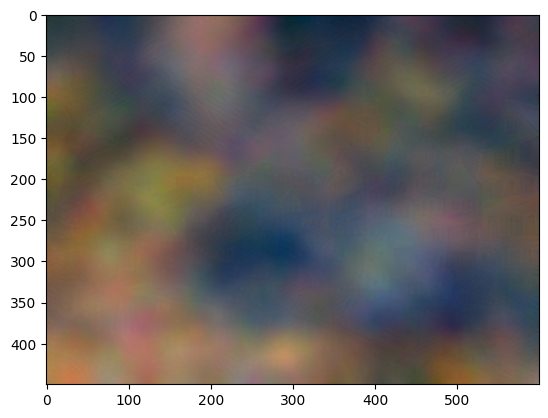

In [42]:
result_for_img = result.copy()
result_for_img -=np.min(result[:449])
result_for_img /=np.max(result[:449])
result_for_img *= 255.0
result_for_img = result_for_img[:, :, ::-1]
result_for_img = np.clip(result_for_img, 0, 255).astype('uint8')
plt.imshow(result_for_img)

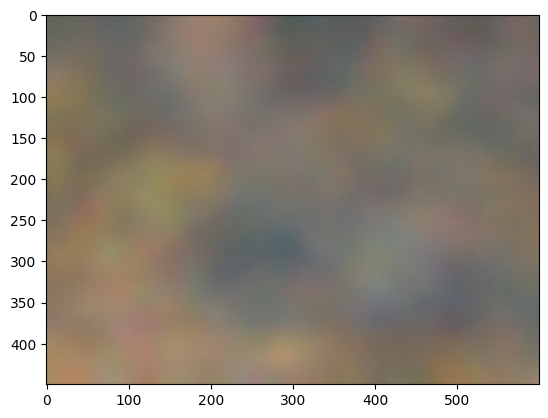

In [46]:
result_for_img = result.copy()
result_for_img -=np.mean(result[:449])
result_for_img *=np.var(result[:449])
result_for_img *= 255.0
result_for_img[:, :, 0] += 103.939
result_for_img[:, :, 1] += 116.779
result_for_img[:, :, 2] += 123.68
result_for_img = result_for_img[:, :, ::-1]
result_for_img = np.clip(result_for_img, 0, 255).astype('uint8')
plt.imshow(result_for_img)

In [50]:
result_before_transpose = optimizing_img.view(3,450,600).detach().numpy()


(3,) [1.9772826 2.0001664 2.093469 ]
[[[1.9772826]]

 [[2.0001664]]

 [[2.093469 ]]]
[0.0524611 0.0917145 0.2587985]


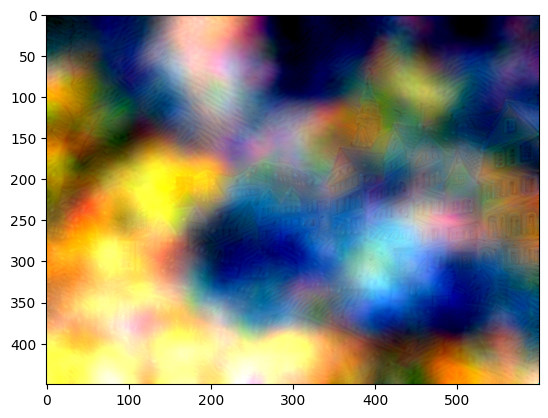

In [83]:
mean =np.mean(result_before_transpose.reshape((3,-1)),axis=1)
print(mean.shape,mean)
mean = np.expand_dims(mean,axis=(1,2))
print(mean)
var = np.var(result_before_transpose.reshape((3,-1)),axis=1)
print(var)
var = np.expand_dims(var,axis=(1,2))
result_for_img = result_before_transpose.copy()
result_for_img =result_for_img-mean

result_for_img *= 255.0
result_for_img[0,:, :] += 103.939
result_for_img[1,:, :] += 116.779
result_for_img[2,:, :] += 123.68



result_for_img = result_for_img.transpose((1,2,0))
result_for_img = result_for_img[:, :, ::-1]
result_for_img = np.clip(result_for_img, 0, 255).astype('uint8')
plt.imshow(result_for_img)

In [85]:
num_of_iterations = 400

total_loss_hist =[]
content_loss_hist = []
style_loss_hist = []
tv_loss_hist =[]

optimizer = LBFGS((optimizing_img,), max_iter=num_of_iterations, line_search_fn='strong_wolfe')
cnt = 0

def closure():
    global cnt
    optimizer.zero_grad()
    total_loss, content_loss, style_loss, tv_loss = build_loss(outputs,optimizing_img)
    total_loss_hist.append(torch.log(total_loss).item())
    content_loss_hist.append(torch.log(content_loss).item())
    style_loss_hist.append(torch.log(style_loss).item())
    tv_loss_hist.append(torch.log(tv_loss).item())

    if total_loss.requires_grad:
        total_loss.backward()
    with torch.no_grad():
        print(f'L-BFGS | iteration: {cnt:03}, total loss={total_loss.item():12.4f}, content_loss={content_loss.item():12.4f}, style loss={style_loss.item():12.4f}, tv loss={tv_loss.item():12.4f}')

    cnt += 1
    return total_loss
optimizer.step(closure)

L-BFGS | iteration: 000, total loss=    214.9008, content_loss=     35.0138, style loss=    126.2000, tv loss=     53.6870
L-BFGS | iteration: 001, total loss=    214.8951, content_loss=     35.0112, style loss=    126.1997, tv loss=     53.6843
L-BFGS | iteration: 002, total loss=    214.8463, content_loss=     34.9887, style loss=    126.1972, tv loss=     53.6604
L-BFGS | iteration: 003, total loss=    214.6329, content_loss=     34.8997, style loss=    126.1875, tv loss=     53.5457
L-BFGS | iteration: 004, total loss=    214.0215, content_loss=     34.9770, style loss=    126.2381, tv loss=     52.8064
L-BFGS | iteration: 005, total loss=    213.5945, content_loss=     34.8127, style loss=    126.2229, tv loss=     52.5589
L-BFGS | iteration: 006, total loss=    213.2826, content_loss=     34.7258, style loss=    126.2430, tv loss=     52.3138
L-BFGS | iteration: 007, total loss=    212.9719, content_loss=     34.6958, style loss=    126.2369, tv loss=     52.0392
L-BFGS | iterati

tensor([214.9008], grad_fn=<AddBackward0>)

In [86]:
result = optimizing_img.view(3,450,600).detach().numpy().transpose((1,2,0))
print(result.shape,result)

(450, 600, 3) [[[ 1.4689687  1.6862031  1.5547209]
  [ 1.4797642  1.691612   1.5582485]
  [ 1.4968282  1.6859841  1.5537055]
  ...
  [ 1.3143255  1.1460382  1.0336531]
  [ 1.3216292  1.144241   1.0320238]
  [ 1.3277239  1.1500111  1.0330406]]

 [[ 1.4712424  1.6804277  1.548882 ]
  [ 1.4827296  1.685502   1.5512933]
  [ 1.4996798  1.682706   1.547825 ]
  ...
  [ 1.3161316  1.1441388  1.0337889]
  [ 1.326418   1.1426376  1.0316869]
  [ 1.3398794  1.1519805  1.0276061]]

 [[ 1.4767683  1.6640259  1.5363557]
  [ 1.4848862  1.6635993  1.5342102]
  [ 1.5067712  1.675122   1.540791 ]
  ...
  [ 1.3126014  1.1392648  1.0401683]
  [ 1.3100338  1.1228137  1.0308359]
  [ 1.304491   1.1080246  1.025007 ]]

 ...

 [[ 1.5026786  2.0068703  1.9173431]
  [ 1.504483   2.0095344  1.9188033]
  [ 1.5049987  2.00472    1.9209526]
  ...
  [ 1.3013747  1.3560462  1.5029932]
  [ 1.2859406  1.3289409  1.5027217]
  [ 1.2769192  1.3136162  1.5043359]]

 [[ 1.5113493  2.0132012  1.9168041]
  [ 1.51508    2.017965

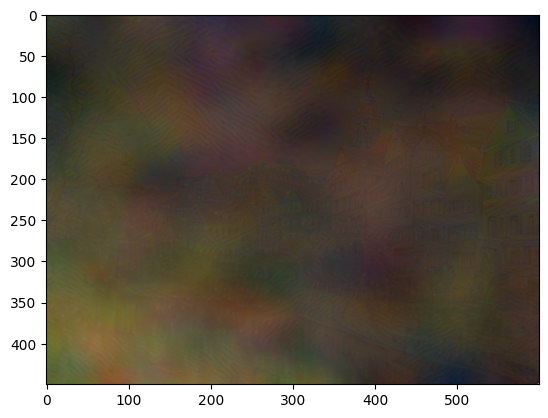

In [87]:
result_for_img = result.copy()
result_for_img -=np.min(result[:449])
result_for_img /=np.max(result[:449])
result_for_img *= 255.0
result_for_img = result_for_img[:, :, ::-1]
result_for_img = np.clip(result_for_img, 0, 255).astype('uint8')
plt.imshow(result_for_img)

(3,) [1.4695481 1.6019441 1.7053976]
[[[1.4695481]]

 [[1.6019441]]

 [[1.7053976]]]
[0.00774149 0.03158112 0.03963361]


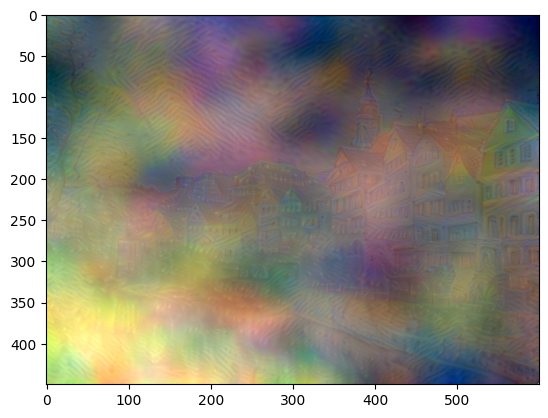

In [88]:
result_before_transpose = optimizing_img.view(3,450,600).detach().numpy()
mean =np.mean(result_before_transpose.reshape((3,-1)),axis=1)
print(mean.shape,mean)
mean = np.expand_dims(mean,axis=(1,2))
print(mean)
var = np.var(result_before_transpose.reshape((3,-1)),axis=1)
print(var)
var = np.expand_dims(var,axis=(1,2))
result_for_img = result_before_transpose.copy()
result_for_img =result_for_img-mean

result_for_img *= 255.0
result_for_img[0,:, :] += 103.939
result_for_img[1,:, :] += 116.779
result_for_img[2,:, :] += 123.68



result_for_img = result_for_img.transpose((1,2,0))
result_for_img = result_for_img[:, :, ::-1]
result_for_img = np.clip(result_for_img, 0, 255).astype('uint8')
plt.imshow(result_for_img)

In [ ]:
print("min",np.mean(result_before_transpose[:449],axis=).shape) #0.7416
print("max",np.var(result_before_transpose[:449])) #3.7226
print(result_before_transpose.shape)

In [34]:
def deprocess_image(input):
    x = input.copy()
    # ImageNet의 평균 픽셀 값을 더합니다
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

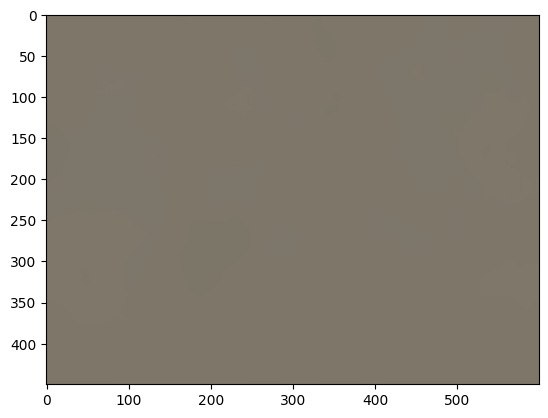

In [23]:
result_img_np =deprocess_image(result)
plt.imshow(result_img_np)

In [24]:

print(result_img_np)

[[[125 118 105]
  [125 118 105]
  [125 118 105]
  ...
  [125 118 105]
  [125 118 105]
  [125 118 105]]

 [[125 118 105]
  [125 118 105]
  [125 118 105]
  ...
  [125 118 105]
  [125 118 105]
  [125 118 105]]

 [[125 118 105]
  [125 118 105]
  [125 118 105]
  ...
  [125 118 105]
  [125 118 105]
  [125 118 105]]

 ...

 [[125 118 105]
  [125 118 105]
  [125 118 105]
  ...
  [126 118 105]
  [126 118 105]
  [126 118 105]]

 [[125 118 105]
  [125 118 105]
  [125 118 105]
  ...
  [126 118 105]
  [126 118 105]
  [126 118 105]]

 [[125 118 105]
  [125 118 105]
  [125 118 105]
  ...
  [126 118 105]
  [126 118 105]
  [192  61 149]]]


In [ ]:
def visualize(loss_hist):
    plt.figure(figsize=(12,4))
    plt.scatter(np.arange(1,len(loss_hist)+1),loss_hist,s=0.5)
    plt.title('generator loss')
    plt.show()

visualize(total_loss_hist)
visualize(content_loss_hist)
visualize(style_loss_hist)
visualize(tv_loss_hist)

(450, 600, 3) [[[ 66  76 134]
  [ 72  92 137]
  [158 147 125]
  ...
  [115 110 128]
  [143 119 122]
  [130 106 106]]

 [[ 76 105 138]
  [156 138 127]
  [237 111  29]
  ...
  [130  90 104]
  [212 141 101]
  [218 173 116]]

 [[161 169 154]
  [138  67  67]
  [209 105  46]
  ...
  [134 109 135]
  [150  95 108]
  [155 127 123]]

 ...

 [[132 145 139]
  [142 135 128]
  [142 109 100]
  ...
  [122 117 126]
  [126  94 102]
  [125 104 111]]

 [[118 119 131]
  [128 127 134]
  [137 135 138]
  ...
  [116 122 126]
  [121 109 114]
  [131 131 130]]

 [[129 132 135]
  [127 124 133]
  [129 122 129]
  ...
  [126 143 130]
  [131 133 122]
  [131 131 125]]]


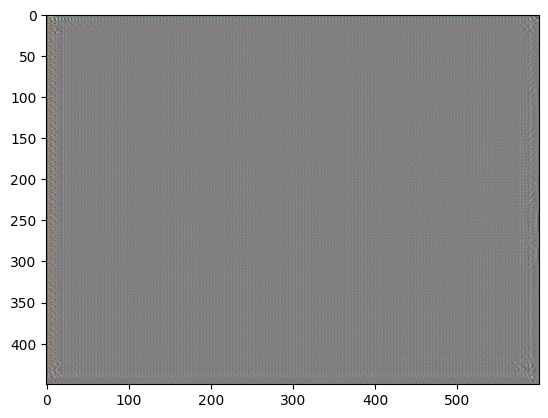

In [168]:


result = np.clip(result,0,255).astype(np.uint8)







In [ ]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(img_rows, img_columns))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img



In [ ]:
from scipy.optimize import fmin_l_bfgs_b

iterations = 1000
x = preprocess_image(content_image_path)
x = x.flatten()
for i in range(iterations):
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                     fprime=evaluator.grads, maxfun=20)
    if i % 100 == 0:
        print('.', end=' ')
        print('현재 손실 값:', min_val)

# 생성된 현재 이미지를 저장합니다
img = x.copy().reshape((img_rows, img_columns, 3))
img = deprocess_image(img)